In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Loading 2014 Local Law 84 Energy and Water data

In [2]:
energyAndWaterData2014 = pd.read_csv(filepath_or_buffer="../Energy_and_Water_Data_Disclosure_for_Local_Law__2014_.csv", 
                                     na_values=('Not Available'))
energyAndWaterData2014.columns


Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identification Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'BBL on the Covered Buildings List',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

Loading 2013 Local Law 84 Energy and Water data

In [3]:
energyAndWaterData2013 = pd.read_csv(filepath_or_buffer="../Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv", na_values=('Not Available'))
energyAndWaterData2013.columns

Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

Loading 2012 Local Law 84 Energy and Water data. Only sub set of columns are availble here. Emissions are not reported as Indirect and Direct. Only a Total GHG Emissions column is available.

In [4]:
energyAndWaterData2012 = pd.read_csv(filepath_or_buffer="../Energy_and_Water_Data_Disclosure_for_Local_Law_84__2012_.csv", na_values=('Not Available'))
energyAndWaterData2012.columns

Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Indoor Water Intensity (All Water Sources)(gal/ft2)',
       'Reported Water Method', 'ENERGY STAR Score',
       'Total GHG Emissions(MtCO2e)',
       'Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'Number of Buildings',
       'Reported BINs'],
      dtype='object')

Loading 2011 Local Law 84 Energy and Water data. Same story here. Less columns compared to 2014 data. GHG reported as total

In [5]:
energyAndWaterData2011 = pd.read_csv(filepath_or_buffer="../Energy_and_Water_Data_Disclosure_for_Local_Law_84__2011_.csv", na_values=('Not Available'))
energyAndWaterData2011.columns

Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI',
       'Weather Normalized Source EUI', 'Water per Square Foot',
       'ENERGY STAR Score', 'GHG', 'Reported Building Square Footage',
       'Reported Facility Type', 'Number of Buildings', 'Reported BINs'],
      dtype='object')

There are buildings that report under the primary BBL number. Remove secondary buildings from the analysis

In [6]:
primaryEnergyAndWaterData2014 = energyAndWaterData2014[energyAndWaterData2014['Site EUI(kBtu/ft2)']!='See Primary BBL']
primaryEnergyAndWaterData2013 = energyAndWaterData2013[energyAndWaterData2013['Site EUI(kBtu/ft2)']!='See Primary BBL']


Convert columns to numeric. Due designations such as "Not Available" in data, columns were typed as Object

In [7]:
listToConvert = ['Site EUI(kBtu/ft2)',
    'Weather Normalized Site EUI(kBtu/ft2)',
    'Source EUI(kBtu/ft2)',
    'Weather Normalized Source EUI(kBtu/ft2)',
    'ENERGY STAR Score',
    'Total GHG Emissions(MtCO2e)',
    'Direct GHG Emissions(MtCO2e)',
    'Indirect GHG Emissions(MtCO2e)',
    'Reported Property Floor Area (Building(s)) (ft²)',
    'DOF Number of Buildings']

numericCols2014 = primaryEnergyAndWaterData2014[listToConvert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
numeric2014 = pd.concat([primaryEnergyAndWaterData2014.drop(labels=listToConvert,axis=1),numericCols2014], axis=1)

numericCols2013 = primaryEnergyAndWaterData2013[listToConvert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
numeric2013 = pd.concat([primaryEnergyAndWaterData2013.drop(labels=listToConvert,axis=1),numericCols2013], axis=1)


Only Energy Start Scores in 2012 data needs to be converted to numeric. All other columns are OK

In [8]:
numeric2012 = energyAndWaterData2012.copy()
numeric2012['ENERGY STAR Score']=pd.to_numeric(energyAndWaterData2012['ENERGY STAR Score'], errors='coerce')
numeric2012.dtypes


BBL                                                      int64
Street Number                                           object
Street Name                                             object
Borough                                                 object
Zip                                                      int64
Benchmarking Submission                                 object
Entry Number                                           float64
Site EUI(kBtu/ft2)                                     float64
Weather Normalized Source EUI(kBtu/ft2)                float64
Indoor Water Intensity (All Water Sources)(gal/ft2)    float64
Reported Water Method                                   object
ENERGY STAR Score                                      float64
Total GHG Emissions(MtCO2e)                            float64
Property Floor Area (Buildngs and Parking)(ft2)        float64
Primary Property Type - Self Selected                   object
Number of Buildings                                    

In [9]:
energyAndWaterData2011.dtypes

BBL                                   int64
Street Number                        object
Street Name                          object
Borough                              object
Zip                                   int64
Benchmarking Submission              object
Entry Number                        float64
Site EUI                            float64
Weather Normalized Source EUI       float64
Water per Square Foot               float64
ENERGY STAR Score                   float64
GHG                                 float64
Reported Building Square Footage    float64
Reported Facility Type               object
Number of Buildings                 float64
Reported BINs                        object
dtype: object

Number of building reporting GHG emissions has improved over the years and remain around 75%

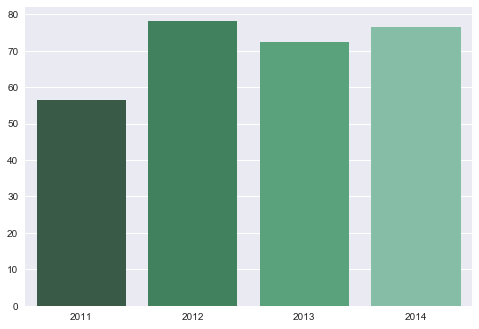

In [10]:
GHGReportingPct2011 = len(energyAndWaterData2011[energyAndWaterData2011['GHG'].notnull()]) / len(energyAndWaterData2011) * 100
GHGReportingPct2012 = len(numeric2012[numeric2012['Total GHG Emissions(MtCO2e)'].notnull()]) / len(energyAndWaterData2012) * 100
GHGReportingPct2013 = len(numeric2013[numeric2013['Total GHG Emissions(MtCO2e)'].notnull()]) / len(energyAndWaterData2013) * 100
GHGReportingPct2014 = len(numeric2014[numeric2014['Total GHG Emissions(MtCO2e)'].notnull()]) / len(energyAndWaterData2014) * 100

x = np.arange(2011,2015)
y1 = [GHGReportingPct2011, GHGReportingPct2012, GHGReportingPct2013, GHGReportingPct2014]
sns.barplot(x, y1, palette="BuGn_d")
#ax1.set_ylabel("Sequential")
#plt.plot([-1, 4], [55.61e6, 55.61e6], linewidth=2)
plt.show()



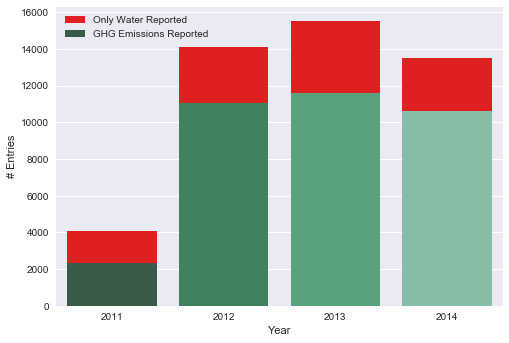

In [11]:
TotalCounts2011 = len(energyAndWaterData2011)
TotalCounts2012 = len(numeric2012)
TotalCounts2013 = len(numeric2013)
TotalCounts2014 = len(numeric2014)

GHGReported2011 = energyAndWaterData2011[energyAndWaterData2011['GHG'].notnull() 
                                              & energyAndWaterData2011['GHG'] !=0]
GHGReported2012 = numeric2012[numeric2012['Total GHG Emissions(MtCO2e)'].notnull()
                                 & numeric2012['Total GHG Emissions(MtCO2e)'] != 0]
GHGReported2013 = numeric2013[numeric2013['Total GHG Emissions(MtCO2e)'].notnull()
                                 & numeric2013['Total GHG Emissions(MtCO2e)'] != 0]
GHGReported2014 = numeric2014[numeric2014['Total GHG Emissions(MtCO2e)'].notnull()
                                 & numeric2014['Total GHG Emissions(MtCO2e)'] != 0]

sns.barplot(x = x, y = [TotalCounts2011, TotalCounts2012, TotalCounts2013, TotalCounts2014], color = "red", label='Only Water Reported')
bottom_plot= sns.barplot(x=x, y=[len(GHGReported2011),
                                 len(GHGReported2012),
                                 len(GHGReported2013),
                                 len(GHGReported2014)], palette="BuGn_d", label="GHG Emissions Reported")

#topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
#bottombar = plt.Rectangle((0,0),1,1,  edgecolor = 'none')
#l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
#l.draw_frame(False)

sns.despine(left=True)
bottom_plot.set_ylabel("# Entries")
bottom_plot.set_xlabel("Year")

plt.legend(loc="upper left")

plt.show()

2011 data seems to be OK. No column type conversion needed

Not what I expected. It seems Total GHG emissions have increased over the years. Numbers seems to be quite high compared to what has been reported for 2014.

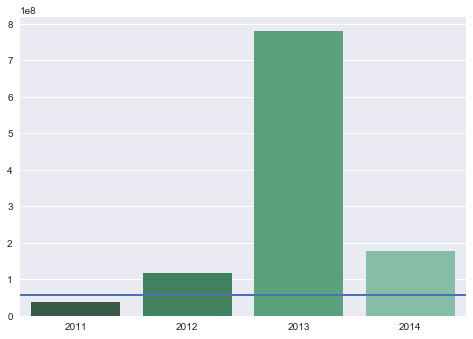

In [12]:
BuildingGHGEmissions2014 = GHGReported2014['Total GHG Emissions(MtCO2e)']
BuildingGHGEmissions2013 = GHGReported2013['Total GHG Emissions(MtCO2e)']
BuildingGHGEmissions2012 = GHGReported2012['Total GHG Emissions(MtCO2e)']
BuildingGHGEmissions2011 = GHGReported2011['GHG']

x = np.arange(2011,2015)
y1 = [BuildingGHGEmissions2011.sum(),BuildingGHGEmissions2012.sum(),BuildingGHGEmissions2013.sum(),BuildingGHGEmissions2014.sum()]
sns.barplot(x, y1, palette="BuGn_d")
#ax1.set_ylabel("Sequential")
plt.plot([-1, 4], [55.61e6, 55.61e6], linewidth=2)
plt.show()


Start looking at 2014 data. Looks like there might be outlier

In [13]:
t = GHGReported2014.loc[GHGReported2014['Total GHG Emissions(MtCO2e)'].notnull() & GHGReported2014['Reported Property Floor Area (Building(s)) (ft²)'].notnull()]

print('Total GHG Emission for 2014: {0:.2f} MtCO2e'.format(t['Total GHG Emissions(MtCO2e)'].sum()/1e6))
print('Indirect GHG Emission for 2014: {0:.2f} MtCO2e'.format(t['Indirect GHG Emissions(MtCO2e)'].sum()/1e6))
print('Direct GHG Emission for 2014: {0:.2f} MtCO2e'.format(t['Direct GHG Emissions(MtCO2e)'].sum()/1e6))
print('\n')

print('Total GHG Emissions, Sums by Property type:')

def get_stats(group,cols):
    return (pd.DataFrame(data={'min': group[cols].min(), 
                               'median': group[cols].median(), 
                               'mean': group[cols].mean(), 
                               'max':group[cols].max(),
                               'count':group[cols].count(),
                               'Q1':group[cols].quantile(.25),
                               'Q3':group[cols].quantile(.75),
                               'IQR':((group[cols].quantile(.75))-(group[cols].quantile(.25)))
                              }))

t.groupby('Primary Property Type - Self Selected').apply(lambda x:get_stats(x,['Total GHG Emissions(MtCO2e)','Site EUI(kBtu/ft2)']))

#according these total office buildings are emitting 137 mln MtCO2e. Which is 3 times the number NYC gov has reported

Total GHG Emission for 2014: 178.31 MtCO2e
Indirect GHG Emission for 2014: 170.15 MtCO2e
Direct GHG Emission for 2014: 8.17 MtCO2e


Total GHG Emissions, Sums by Property type:


IQR  \
Primary Property Type - Self Selected                                                       
Adult Education                                    Total GHG Emissions(MtCO2e)    182.450   
                                                   Site EUI(kBtu/ft2)              16.800   
Automobile Dealership                              Total GHG Emissions(MtCO2e)    289.850   
                                                   Site EUI(kBtu/ft2)              30.850   
Bank Branch                                        Total GHG Emissions(MtCO2e)    177.450   
                                                   Site EUI(kBtu/ft2)              12.350   
College/University                                 Total GHG Emissions(MtCO2e)   1518.525   
                                                   Site EUI(kBtu/ft2)              88.000   
Courthouse                                         Total GHG Emissions(MtCO2e)    342.450   
                                                   Site EUI(kBtu/ft2)              90.200   
Data Center                                        Total GHG Emissions(MtCO2e)  10169.850   
                                                   Site EUI(kBtu/ft2)             147.400   
Distribution Center                                Total GHG Emissions(MtCO2e)    454.500   
                                                   Site EUI(kBtu/ft2)              57.325   
Enclosed Mall                                      Total GHG Emissions(MtCO2e)      0.000   
                                                   Site EUI(kBtu/ft2)               0.000   
Financial Office                                   Total GHG Emissions(MtCO2e)   3486.500   
                                                   Site EUI(kBtu/ft2)              46.500   
Fitness Center/Health Club/Gym                     Total GHG Emissions(MtCO2e)      0.000   
                                                   Site EUI(kBtu/ft2)               0.000   
Hospital (General Medical & Surgical)              Total GHG Emissions(MtCO2e)   9347.975   
                                                   Site EUI(kBtu/ft2)             181.125   
Hotel                                              Total GHG Emissions(MtCO2e)   1476.675   
                                                   Site EUI(kBtu/ft2)              57.600   
K-12 School                                        Total GHG Emissions(MtCO2e)    452.100   
                                                   Site EUI(kBtu/ft2)              30.400   
Laboratory                                         Total GHG Emissions(MtCO2e)   4052.550   
                                                   Site EUI(kBtu/ft2)              40.600   
Library                                            Total GHG Emissions(MtCO2e)      0.000   
                                                   Site EUI(kBtu/ft2)               0.000   
...                                                                                   ...   
Personal Services (Health/Beauty, Dry Cleaning,... Total GHG Emissions(MtCO2e)      0.000   
                                                   Site EUI(kBtu/ft2)               0.000   
Police Station                                     Total GHG Emissions(MtCO2e)    299.250   
                                                   Site EUI(kBtu/ft2)              62.250   
Refrigerated Warehouse                             Total GHG Emissions(MtCO2e)    161.925   
                                                   Site EUI(kBtu/ft2)              78.250   
Repair Services (Vehicle, Shoe, Locksmith, etc.)   Total GHG Emissions(MtCO2e)    102.600   
                                                   Site EUI(kBtu/ft2)              17.950   
Residence Hall/Dormitory                           Total GHG Emissions(MtCO2e)    809.625   
                                                   Site EUI(kBtu/ft2)              74.550   
Restaurant                                         Total GHG Emissions(MtCO2e)      0.0

In [14]:
GHGReported2011

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI,Weather Normalized Source EUI,Water per Square Foot,ENERGY STAR Score,GHG,Reported Building Square Footage,Reported Facility Type,Number of Buildings,Reported BINs
1,1000090001,34,WHITEHALL STREET,MANHATTAN,10004,Yes,1518.0,157.9,437.4,NaN,27.0,12077.53,852840.0,Office,1.0,1000018
2,1000090014,17,STATE STREET,MANHATTAN,10004,Yes,312.0,91.5,278.7,NaN,61.0,4817.62,574105.0,Office,1.0,1000020
3,1000090029,24,WHITEHALL STREET,MANHATTAN,10004,Yes,52.0,137.2,306.6,6.66,41.0,10190.38,859807.0,Office,1.0,1000021
5,1000100016,90,BROAD STREET,MANHATTAN,10004,Yes,602.0,53.5,153.8,NaN,76.0,1846.50,380788.0,Office,1.0,1-00010-0016
6,1000100023,1,WHITEHALL STREET,MANHATTAN,10004,Yes,48.0,113.1,252.1,12.96,58.0,3218.11,329991.0,Office,1.0,1000027
7,1000110021,80,BROAD STREET,MANHATTAN,10004,Yes,2531.0,77.2,194.6,NaN,69.0,2719.82,400000.0,Office,1.0,1000038
9,1000130005,11,BROADWAY,MANHATTAN,10004,Yes,275.0,100.9,237.2,NaN,72.0,3717.62,423348.0,Office,1.0,BIN# 1000044
10,1000130027,25,BROADWAY,MANHATTAN,10004,Yes,2538.0,132.8,373.7,NaN,28.0,9667.46,807690.0,Office,1.0,1000045
11,1000160010,18,1 PLACE,MANHATTAN,10280,Yes,2542.0,128.3,428.4,NaN,NaN,1374.17,114100.0,Entertainment/Culture,1.0,1084594
12,1000160120,200,LIBERTY STREET,MANHATTAN,10281,Yes,22.0,117.3,257.9,10.50,86.0,14825.93,1485610.0,Office,1.0,NaN


Keep only columns that I need and standardize names across years

In [15]:
LL2014 = GHGReported2014[['NYC Borough, Block, and Lot (BBL)',
                'Street Number',
                'Street Name',
                'Borough',
                'Zip Code',
                'Site EUI(kBtu/ft2)',
                'Weather Normalized Site EUI(kBtu/ft2)',
                'Source EUI(kBtu/ft2)',
                'Weather Normalized Source EUI(kBtu/ft2)',
                'ENERGY STAR Score',
                'Total GHG Emissions(MtCO2e)',
                'Direct GHG Emissions(MtCO2e)',
                'Indirect GHG Emissions(MtCO2e)',
                'Primary Property Type - Self Selected',
                'Reported Property Floor Area (Building(s)) (ft²)']]
#Rename for ease of use
LL2014.columns = ['BBL',
                'StreetNumber',
                'StreetName',
                'Borough',
                'Zip',
                'SiteEUI',
                'WNsiteEUI',
                'SourceEUI',
                'WNsourceEUI',
                'EnergyStar',
                'TotalGHG',
                'DirectGHG',
                'IndirectGHG',
                'PropertyType',
                'FloorArea']
LL2014['YearReported'] = 2014

LL2013 = GHGReported2013[['NYC Borough, Block, and Lot (BBL)',
                'Street Number',
                'Street Name',
                'Borough',
                'Zip Code',
                'Site EUI(kBtu/ft2)',
                'Weather Normalized Site EUI(kBtu/ft2)',
                'Source EUI(kBtu/ft2)',
                'Weather Normalized Source EUI(kBtu/ft2)',
                'ENERGY STAR Score',
                'Total GHG Emissions(MtCO2e)',
                'Direct GHG Emissions(MtCO2e)',
                'Indirect GHG Emissions(MtCO2e)',
                'Primary Property Type - Self Selected',
                'Reported Property Floor Area (Building(s)) (ft²)']]

LL2013.columns = ['BBL',
                'StreetNumber',
                'StreetName',
                'Borough',
                'Zip',
                'SiteEUI',
                'WNsiteEUI',
                'SourceEUI',
                'WNsourceEUI',
                'EnergyStar',
                'TotalGHG',
                'DirectGHG',
                'IndirectGHG',
                'PropertyType',
                'FloorArea']
LL2013['YearReported'] = 2013

LL2012 = GHGReported2012[['BBL',
                'Street Number',
                'Street Name',
                'Borough',
                'Zip',
                'Site EUI(kBtu/ft2)',
                'Weather Normalized Source EUI(kBtu/ft2)',
                'ENERGY STAR Score',
                'Total GHG Emissions(MtCO2e)',
                'Primary Property Type - Self Selected',
                'Property Floor Area (Buildngs and Parking)(ft2)']]
LL2012.columns = ['BBL',
                'StreetNumber',
                'StreetName',
                'Borough',
                'Zip',
                'SiteEUI',
                'WNsourceEUI',
                'EnergyStar',
                'TotalGHG',
                'PropertyType',
                'FloorArea']

LL2012['YearReported'] = 2012

LL2011 = GHGReported2011[['BBL',
                'Street Number',
                'Street Name',
                'Borough',
                'Zip',
                'Site EUI',
                'Weather Normalized Source EUI',
                'ENERGY STAR Score',
                'GHG',
                'Reported Facility Type',
                'Reported Building Square Footage']]
LL2011.columns = ['BBL',
                'StreetNumber',
                'StreetName',
                'Borough',
                'Zip',
                'SiteEUI',
                'WNsourceEUI',
                'EnergyStar',
                'TotalGHG',
                'PropertyType',
                'FloorArea']
LL2011['YearReported'] = 2011

/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

Use Site EUI of 60,000 KBTU/ft2 as the cut off for outliers. After controlling for outliers, data shows that total green house gas emissions have decrease after 2012. 2014 total GHG emissions number is in the same ball park of 70%(arounf 70% of NYC's GHG emissions come from buildings) of the NYC officially reported number

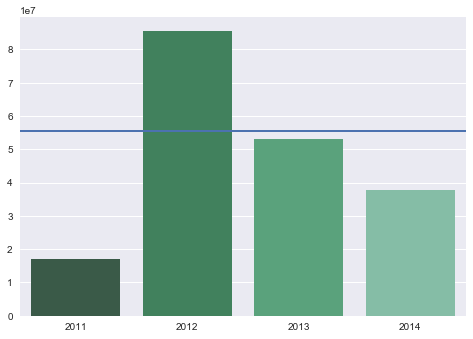

In [16]:
outliersLL2014 = LL2014[LL2014['SiteEUI']>=60000]
outliersLL2013 = LL2013[LL2013['SiteEUI']>=60000]
outliersLL2012 = LL2012[LL2012['SiteEUI']>=60000]
outliersLL2011 = LL2011[LL2011['SiteEUI']>=60000]

LL2014 = LL2014[LL2014['SiteEUI']<60000]
LL2013 = LL2013[LL2013['SiteEUI']<60000]
LL2012 = LL2012[LL2012['SiteEUI']<60000]
LL2011 = LL2011[LL2011['SiteEUI']<60000]

x = np.arange(2011,2015)
y1 = [LL2011['TotalGHG'].sum(),LL2012['TotalGHG'].sum(),LL2013['TotalGHG'].sum(),LL2014['TotalGHG'].sum()]
sns.barplot(x, y1, palette="BuGn_d")
#ax1.set_ylabel("Sequential")
plt.plot([-1, 4], [55.61e6, 55.61e6], linewidth=2)
plt.show()

Attempt to control for outliers using a more sophisticated method. Look within each building type. If less that 10 buildings in the cateogory then use 10,000 EUI as the cutf off. If more than 10 buildings in the category then use 5 times interquartile range above the Q3 as the cut off

In [17]:
x = GHGReported2014[GHGReported2014['Total GHG Emissions(MtCO2e)'].notnull() & GHGReported2014['Reported Property Floor Area (Building(s)) (ft²)'].notnull()]

propertyLevelMedian = x.groupby('Primary Property Type - Self Selected')['Site EUI(kBtu/ft2)'].median()
propertyLevelCount = x.groupby('Primary Property Type - Self Selected')['Site EUI(kBtu/ft2)'].count()
propertyLevelQ1 = x.groupby('Primary Property Type - Self Selected')['Site EUI(kBtu/ft2)'].quantile(.25)
propertyLevelQ3 = x.groupby('Primary Property Type - Self Selected')['Site EUI(kBtu/ft2)'].quantile(.75)

propLevelStats = pd.DataFrame({'medianSiteEUIWithinPropType':propertyLevelMedian,
              'countWithinPropType':propertyLevelCount,
              'Q1SiteEUIWithinPropType':propertyLevelQ1,
              'Q3SiteEUIWithinPropType':propertyLevelQ3,
              'IQRSiteEUIWithinPropType':(propertyLevelQ3 - propertyLevelQ1)
             })

x2 = x.merge(propLevelStats,left_on='Primary Property Type - Self Selected', right_index=True)

def isOutlier(r):
    if r['countWithinPropType'] < 10:
        if r['Site EUI(kBtu/ft2)'] > 10000:
            return(True)
        else:
            return(False)
    else:
        #if 200000 < r['Site EUI(kBtu/ft2)']:
        if(r['Q3SiteEUIWithinPropType'] + (r['IQRSiteEUIWithinPropType'] * 5)) < r['Site EUI(kBtu/ft2)']:
            return(True)
        else:
            return(False)

x2['isOutlier'] = x2.apply(lambda x:isOutlier(x), axis=1)

print(x2[~x2['isOutlier']]['Total GHG Emissions(MtCO2e)'].sum()/1e6)
outliers2014 = x2[x2['isOutlier']]
print('{} outliers account for GHG emission of {}'.format(len(outliers2014), outliers2014['Total GHG Emissions(MtCO2e)'].sum()/1e6))
      
      
x2[x2['isOutlier']][['Street Number','Street Name', 'Borough', 
                     'Zip Code','Primary Property Type - Self Selected','Site EUI(kBtu/ft2)','Total GHG Emissions(MtCO2e)',
                     'Q3SiteEUIWithinPropType']].sort_values('Total GHG Emissions(MtCO2e)',ascending=False)
#x= t.groupby('Primary Property Type - Self Selected').apply(lambda x:get_stats(x,['Site EUI(kBtu/ft2)']))
#x.unstack()[['count','median']].unstack(level=1)
#LL2014.merge(propertyLevelStats,on='Primary Property Type - Self Selected')

13.157419099999931
117 outliers account for GHG emission of 165.1532677


,Street Number,Street Name,Borough,Zip Code,Primary Property Type - Self Selected,Site EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Q3SiteEUIWithinPropType
11509,121,AVENUE OF THE AMER,MANHATTAN,10013.0,Office,10804120.0,60521600.0,104.500
8866,1352,BROADWAY,MANHATTAN,10018.0,Office,9932717.0,50956980.0,104.500
2789,78,TRINITY PLACE,MANHATTAN,10006.0,Office,778850.6,8665042.0,104.500
2028,59,MAIDEN LANE,MANHATTAN,10038.0,Office,58195.8,4637455.0,104.500
8985,320,WEST 31 STREET,MANHATTAN,10001.0,College/University,466788.9,3595407.0,143.600
9958,2,EAST 55 STREET,MANHATTAN,10022.0,Hotel,89841.3,2553575.3,153.700
10213,870,7 AVENUE,MANHATTAN,10019.0,Hotel,28576.3,2489949.0,153.700
2920,10,UNION SQUARE EAST,MANHATTAN,10003.0,Multifamily Housing,35395.6,2368005.5,105.200
38,235,WEST 56 STREET,MANHATTAN,10019.0,Multifamily Housing,51265.0,2097196.5,105.200
7566,200,EAST 61 STREET,MANHATTAN,10065.0,Multifamily Housing,117755.5,1970144.3,105.200


Total GHG emissions over the years

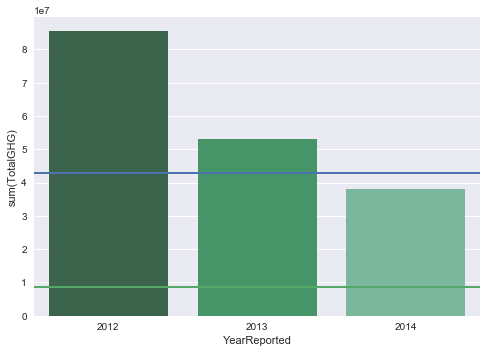

In [352]:
LLCombined = LL2014.append(LL2013).append(LL2012)


sns.barplot('YearReported', 'TotalGHG', data=LLCombined, palette="BuGn_d",estimator=sum, ci=None)
#ax1.set_ylabel("Sequential")
plt.plot([-1, 4], [43e6, 43e6], linewidth=2)
plt.plot([-1, 4], [43e6*.2, 43e6*.2], linewidth=2)
plt.show()


Percent reduction from 2005 levels

                  TotalGHG
YearReported              
2012          8.548644e+07
2013          5.312609e+07
2014          3.791260e+07
              GHGe Reduction % of 2005 GHGe
YearReported                               
2012                              98.805667
2013                              23.549048
2014                             -11.831159


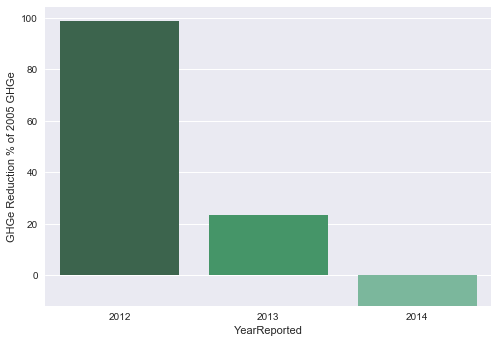

In [350]:
totalGHGbyYear = LLCombined[LLCombined['YearReported'] > 2011].groupby('YearReported')[['TotalGHG']].sum()
print(totalGHGbyYear)
pctReductionFrom2005byYear = (totalGHGbyYear - (43e6))/(43e6)*100
pctReductionFrom2005byYear.columns = ['GHGe Reduction % of 2005 GHGe']
print(pctReductionFrom2005byYear)

pctReductionPlot = sns.barplot(x=pctReductionFrom2005byYear.index, y='GHGe Reduction % of 2005 GHGe', data=pctReductionFrom2005byYear, palette="BuGn_d",capsize=.2)
pctReductionPlot.set_ylabel("GHGe Reduction % of 2005 GHGe")
#plt.plot([-1, 4], [55.61e6, 55.61e6], linewidth=2)
plt.show()

Calculate per square feet GHG emissions

In [20]:
LLCombined.loc[LLCombined['FloorArea']>0,'TotalGHGPerSqft'] = LLCombined.loc[LLCombined['FloorArea']>0,'TotalGHG'] / LLCombined.loc[LLCombined['FloorArea']>0,'FloorArea']

In [21]:
onlyLL2014 = LLCombined[LLCombined['YearReported']==2014]

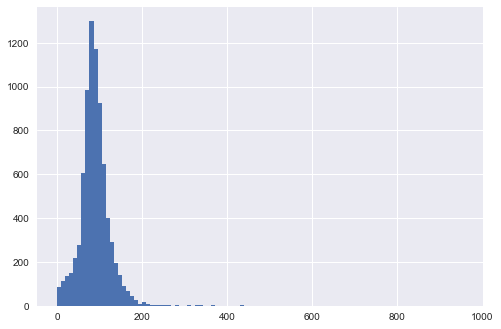

In [23]:


multifamily_2014 = (onlyLL2014[onlyLL2014['PropertyType']=='Multifamily Housing'])

plt.hist('SiteEUI', data=multifamily_2014[multifamily_2014['SiteEUI']<1500],bins=100)
#plt.xscale('log')
plt.show()


#g = sns.FacetGrid(multifamily_2014, col="Borough")
#g = g.map(plt.hist, "PropertyType", edgecolor="w")
#plt.show()

In [136]:
#LLCombined.groupby('PropertyType')

#sns.violinplot(x="YearReported", y="TotalGHG", data=LLCombined)
#plt.yscale('log')
#plt.show()

                            TotalGHGPerSqft
PropertyType                               
Multifamily Housing                    7979
Office                                 1183
Other                                   194
Hotel                                   178
Non-Refrigerated Warehouse              155
Retail Store                             94


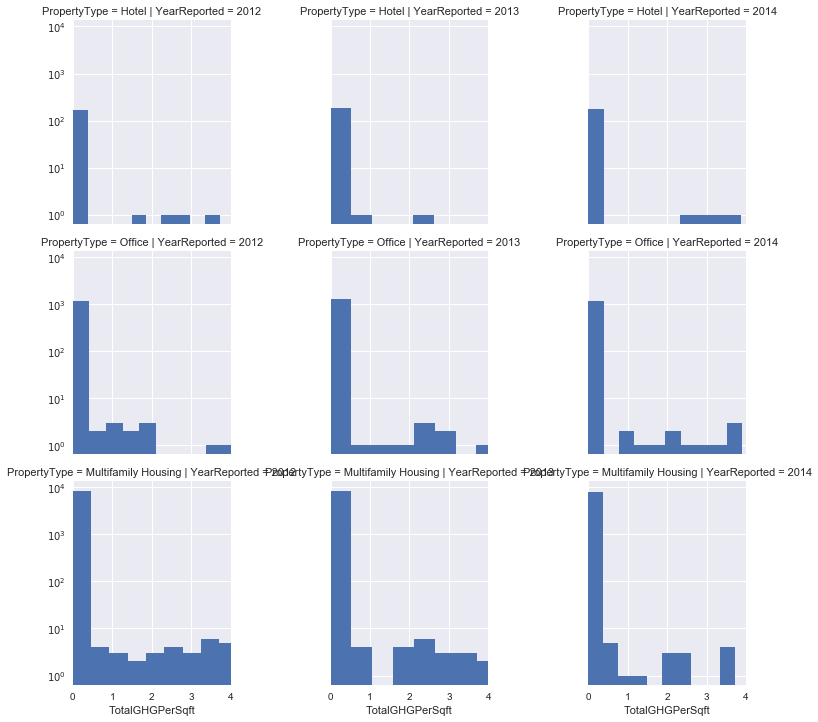

In [240]:
topPropertyTypesByCount = onlyLL2014.groupby('PropertyType')[['TotalGHGPerSqft']].count().sort_values('TotalGHGPerSqft',ascending=False).head(6)
print(topPropertyTypesByCount)

selectPropertyTypes = LLCombined[LLCombined['PropertyType'].isin(['Multifamily Housing','Office','Hotel'])]
selectPropertyTypes2012_2014 = selectPropertyTypes[selectPropertyTypes['YearReported']>=2012]

g = sns.FacetGrid(selectPropertyTypes2012_2014, col="YearReported", size=3.4, row='PropertyType')
plt.yscale('log')
plt.xlim((0,4))
g.map(plt.hist, "TotalGHGPerSqft").add_legend();
plt.show()

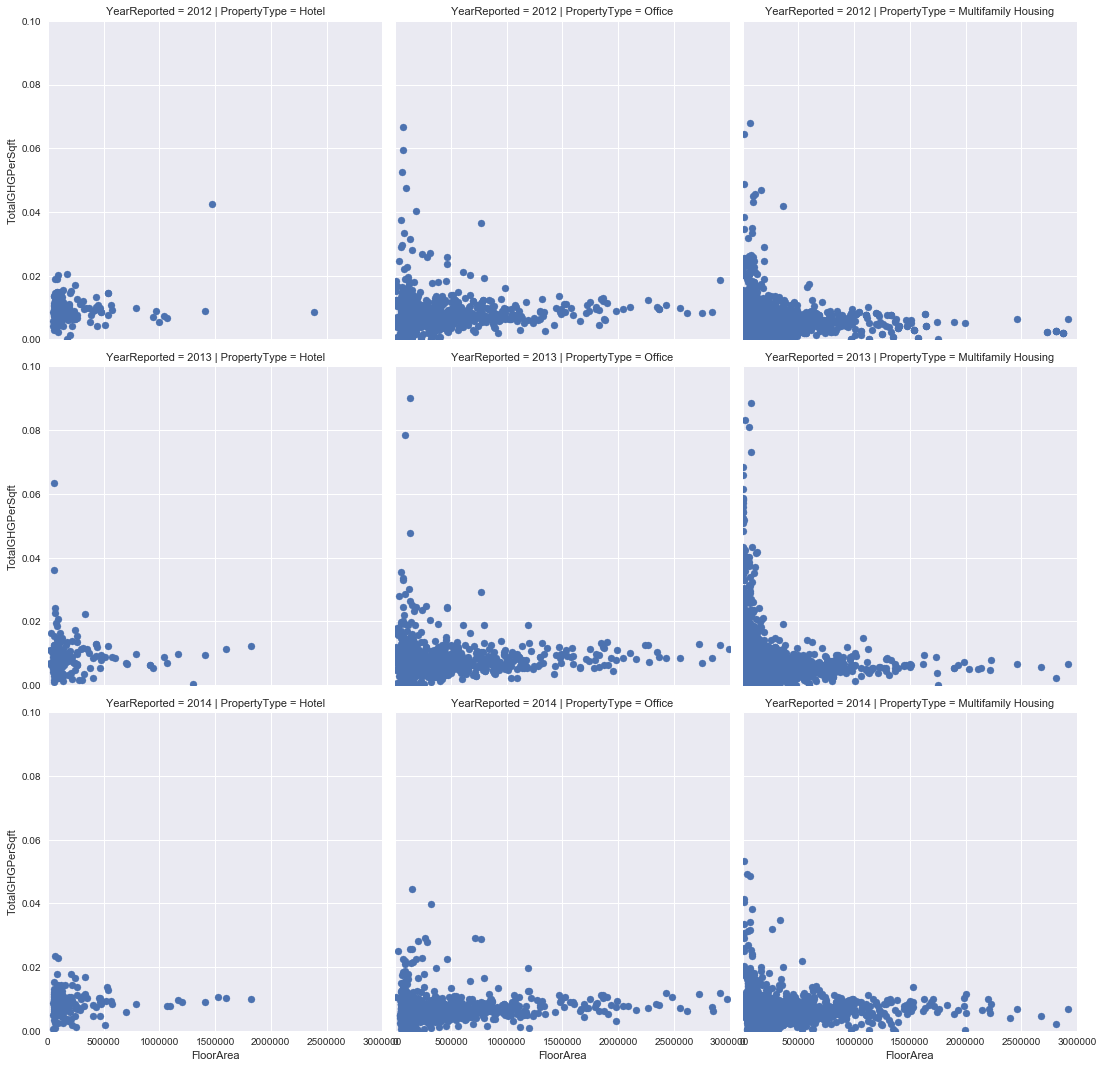

In [241]:
g = sns.FacetGrid(selectPropertyTypes2012_2014, col='PropertyType', row='YearReported',size=5)
g = g.map(plt.scatter,'FloorArea', 'TotalGHGPerSqft').add_legend();
plt.xlim((0,.3e7))
plt.ylim((0,.1))
plt.show()


Total green house gas emission per square foot has decreased in Multifamily Housing. In Hotels and Offices green house gas emissions per square foot has gone up

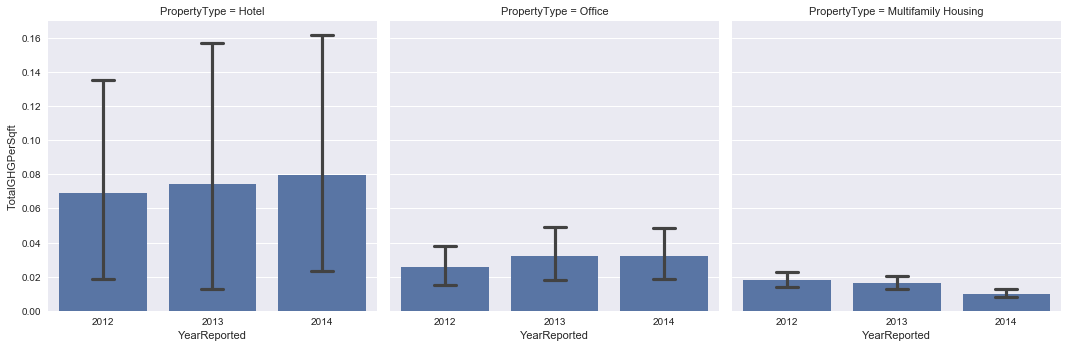

In [242]:
g = sns.FacetGrid(selectPropertyTypes2012_2014, col='PropertyType',size=5)
ax = g.map(sns.barplot,"YearReported", "TotalGHGPerSqft",capsize=.2)
plt.show()

Site EUI per sq ft above 50KBTU, break building size by sq footage buckets, show savings

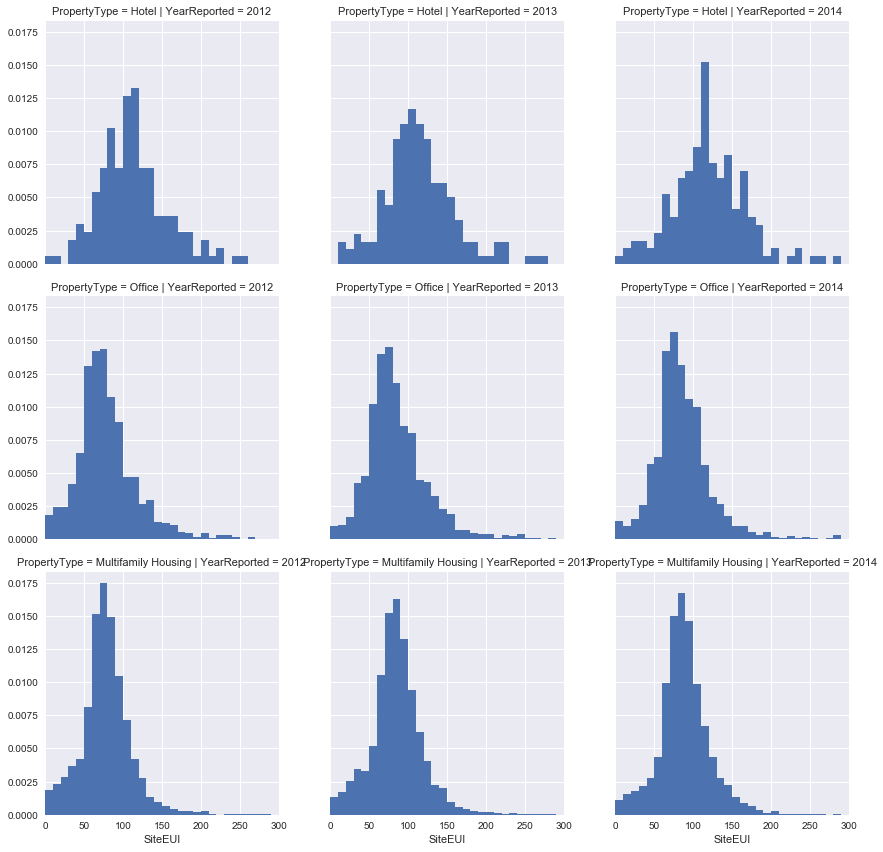

In [243]:
selectPropertyTypes2012_2014 = selectPropertyTypes2012_2014[selectPropertyTypes2012_2014['FloorArea'].notnull()]

g = sns.FacetGrid(selectPropertyTypes2012_2014, col="YearReported", size=4, row='PropertyType')
#plt.yscale('log')
plt.xlim((0,300))
g.map(plt.hist, "SiteEUI", bins=np.arange(0,300,10),normed=True).add_legend();
plt.show()

Percent of buildings below 50KBTU, percent of buildings between 50-75 KBTU, percent of buildings between 75-100 KBTU, percent of buildings over 100 KBTU

/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


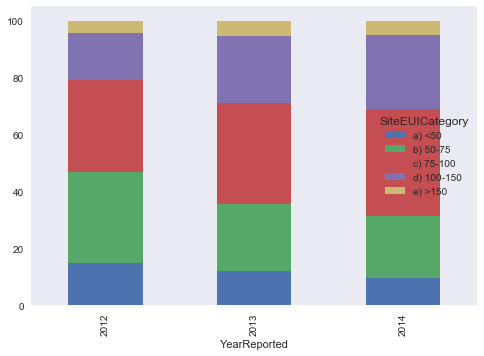

In [244]:
bins = [0, 50, 75, 100,150,100000]
group_names = ['a) <50', 'b) 50-75', 'c) 75-100','d) 100-150','e) >150']

categories = pd.cut(selectPropertyTypes2012_2014['SiteEUI'], bins, labels=group_names)
selectPropertyTypes2012_2014['SiteEUICategory'] = categories

countBySiteEUICat = selectPropertyTypes2012_2014.groupby(['YearReported','SiteEUICategory'], as_index=False)[['TotalGHG']].count()
countByYear = selectPropertyTypes2012_2014.groupby(['YearReported'], as_index=False)[['TotalGHG']].count()

pct = countBySiteEUICat.merge(countByYear,how='left',on='YearReported')
pct['Pct'] = pct['TotalGHG_x']/pct['TotalGHG_y']*100


#countBySiteEUICat
pct.pivot('YearReported','SiteEUICategory').Pct.plot(kind='bar',stacked=True, grid=False)
plt.show()

In [245]:
selectPropertyTypes2014 = selectPropertyTypes2012_2014[selectPropertyTypes2012_2014['YearReported'] == 2014]

                    TotalGHG_x                                        \
SiteEUICategory         a) <50 b) 50-75 c) 75-100 d) 100-150 e) >150   
PropertyType                                                           
Hotel                       11       18        24         79      46   
Multifamily Housing        751     1681      3132       2055     360   
Office                     140      329       365        268      79   

                    TotalGHG_y                                        \
SiteEUICategory         a) <50 b) 50-75 c) 75-100 d) 100-150 e) >150   
PropertyType                                                           
Hotel                      178      178       178        178     178   
Multifamily Housing       7979     7979      7979       7979    7979   
Office                    1183     1183      1183       1183    1183   

                           Pct                                              
SiteEUICategory         a) <50   b) 50-75  c) 75-100 d) 1

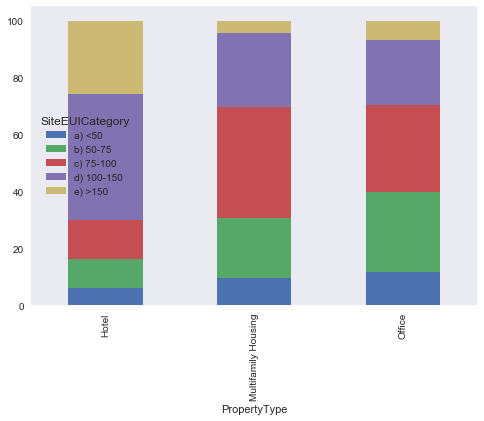

In [246]:
countBySiteEUICat = selectPropertyTypes2014.groupby(['PropertyType','SiteEUICategory'], as_index=False)[['TotalGHG']].count()
countByYear = selectPropertyTypes2014.groupby(['PropertyType'], as_index=False)[['TotalGHG']].count()

pct = countBySiteEUICat.merge(countByYear,how='left',on='PropertyType')
pct['Pct'] = pct['TotalGHG_x']/pct['TotalGHG_y']*100

print(pct.pivot('PropertyType','SiteEUICategory'))
#countBySiteEUICat
pct.pivot('PropertyType','SiteEUICategory').Pct.plot(kind='bar',stacked=True, grid=False)
plt.show()

Floor Area distribution of Multifamily housing by Borough

['Hotel' 'Office' 'K-12 School' 'Multifamily Housing' 'Retail Store'
 'Financial Office' 'Hospital (General Medical & Surgical)' 'Other'
 'Laboratory' 'Medical Office' 'Other - Entertainment/Public Assembly'
 'Adult Education' 'College/University' 'Parking'
 'Residence Hall/Dormitory' 'Urgent Care/Clinic/Other Outpatient'
 'Other - Specialty Hospital' 'Senior Care Community' 'Distribution Center'
 'Non-Refrigerated Warehouse' 'Self-Storage Facility' 'Other - Education'
 'Mixed Use Property' 'Data Center' 'Manufacturing/Industrial Plant'
 'Other - Services' 'Worship Facility' 'Other - Mall' 'Other - Utility'
 'Outpatient Rehabilitation/Physical Therapy' 'Supermarket/Grocery Store'
 'Automobile Dealership' 'Refrigerated Warehouse' 'Library'
 'Social/Meeting Hall' 'Other - Recreation' 'Restaurant'
 'Repair Services (Vehicle, Shoe, Locksmith, etc.)'
 'Other - Lodging/Residential' 'Strip Mall' 'Museum' 'Courthouse'
 'Fitness Center/Health Club/Gym' 'Enclosed Mall' 'Police Station'
 'Perform

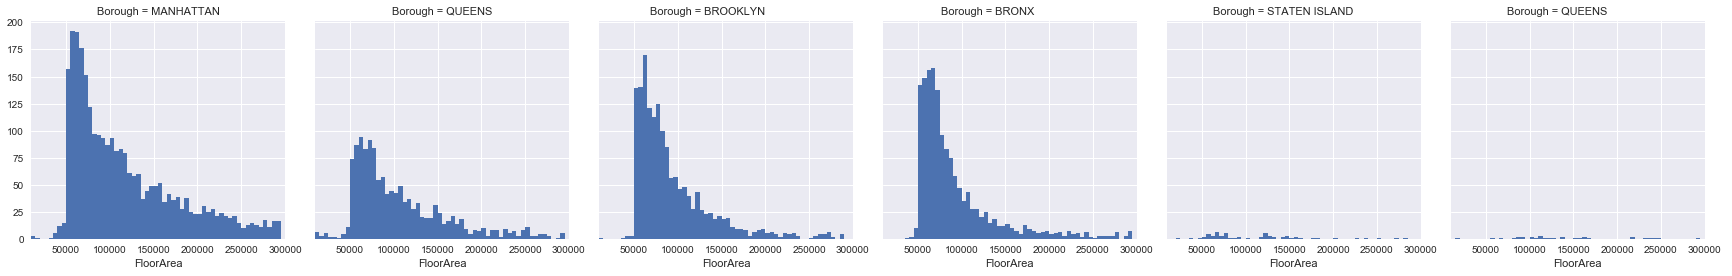

In [247]:
multiFamily = selectPropertyTypes2012_2014[(selectPropertyTypes2012_2014['PropertyType']=='Multifamily Housing') ]
multiFamily2014 = multiFamily[multiFamily['YearReported'] == 2014]

print(LLCombined['PropertyType'].unique())

g = sns.FacetGrid(multiFamily2014, size=4, col='Borough')
#plt.yscale('log')
plt.xlim((10e3,.3e6))
g.map(plt.hist, "FloorArea", bins=np.arange(10e3,.3e6,5000),normed=False).add_legend();
plt.show()

In [248]:
#selectPropertyTypes2012_2014[selectPropertyTypes2012_2014['FloorArea'].notnull()]

#g = sns.FacetGrid(selectPropertyTypes2012_2014[selectPropertyTypes2012_2014['FloorArea'].notnull()], col="PropertyType", size=3.4, row='Borough')
#plt.yscale('log')
#plt.xlim((10e3,1e6))
#g.map(plt.hist, "FloorArea", bins=(0,10e3,25e3,50e3,75e3,100e3,150e3,250e3,500e3,1000e3,5000e3)).add_legend();
#plt.show()


Top 10% of greenhouse gas emitter per square foot emits majority of green house gas emissions 

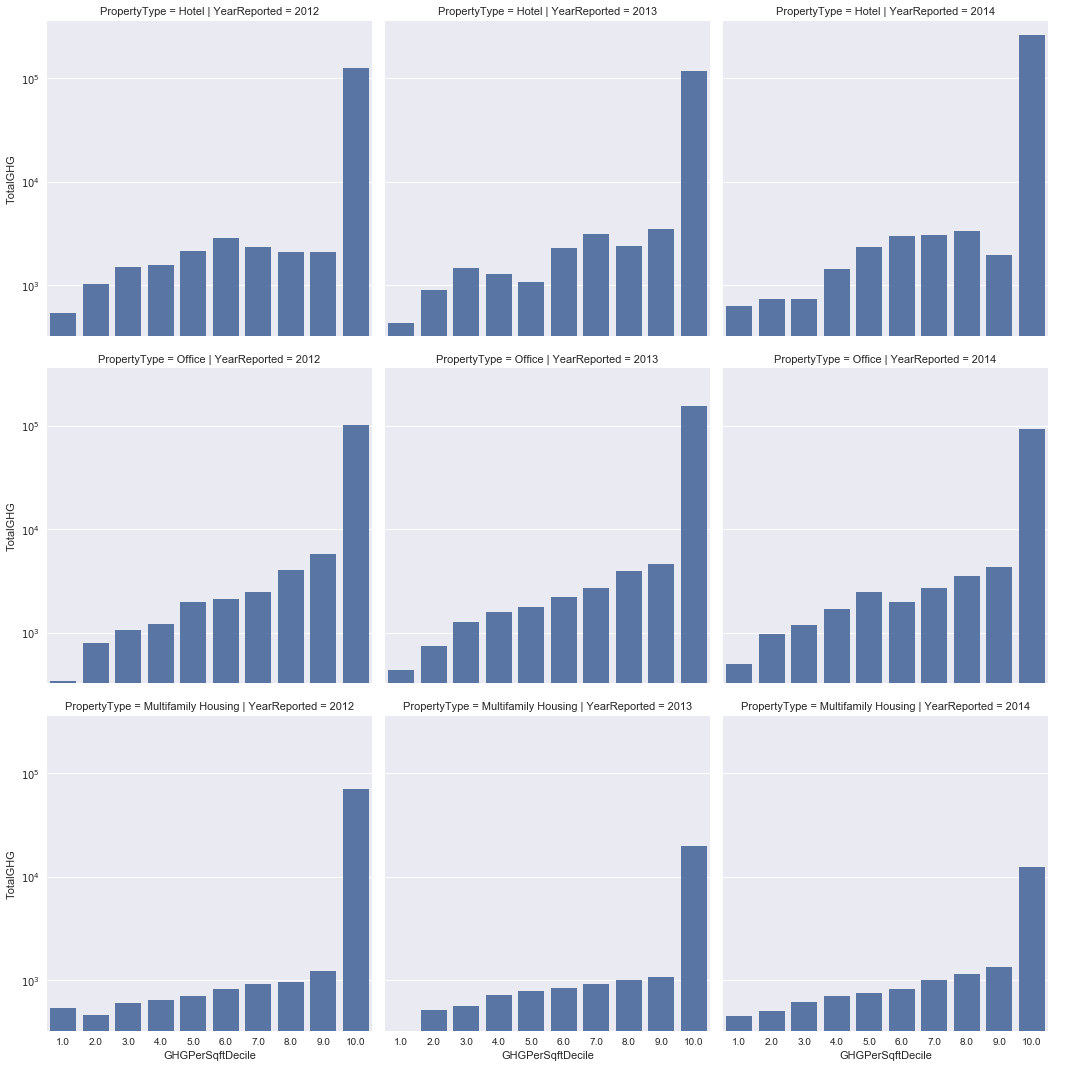

In [299]:
t = selectPropertyTypes2012_2014.copy()
t['GHGPerSqftDecile'] = selectPropertyTypes2012_2014.groupby(['YearReported',
                                      'PropertyType'])['TotalGHGPerSqft'].transform(lambda x: pd.qcut(x,10,labels=range(1,11)))

g = sns.FacetGrid(t, col='YearReported', row='PropertyType',size=5)
g = g.map(sns.barplot,'GHGPerSqftDecile', 'TotalGHG', ci=None,estimator=np.mean).add_legend();
#plt.xlim((0,.3e7))
#plt.ylim((0,.1))
plt.yscale('log')
plt.show()

Quintiles by Energy usage

In [301]:
t = selectPropertyTypes2012_2014.copy()
t['SiteEUIQuintile'] = selectPropertyTypes2012_2014.groupby(['YearReported',
                                      'PropertyType'])['SiteEUI'].transform(lambda x: pd.qcut(x,5,labels=range(1,6)))



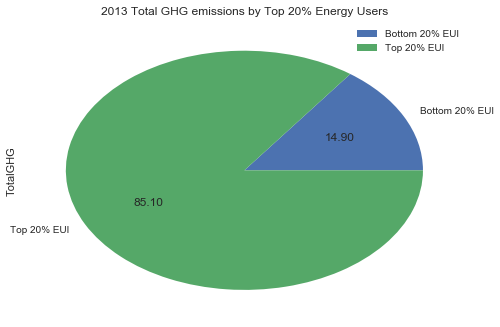

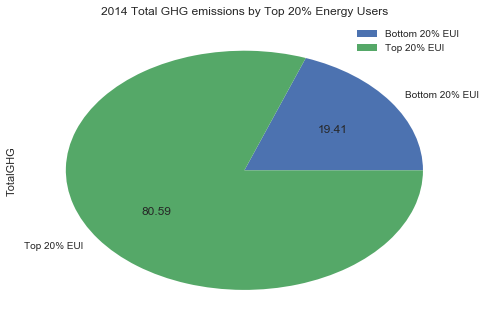

In [328]:
t['EUIGroup'] = pd.cut(t['SiteEUIQuintile'], [0,4,5], labels=['Bottom 20% EUI','Top 20% EUI'])
#t.groupby(['YearReported','EUIGroup'])[['TotalGHG']].sum().plot.pie(subplots=True)
#plt.show()

t[t['YearReported']==2013].groupby('EUIGroup').sum().plot.pie(y='TotalGHG',autopct='%.2f')
plt.title('2013 Total GHG emissions by Top 20% Energy Users')
plt.show()



t[t['YearReported']==2014].groupby('EUIGroup').sum().plot.pie(y='TotalGHG',autopct='%.2f')
plt.title('2014 Total GHG emissions by Top 20% Energy Users')
plt.show()




Top quintile of energy users in Multifamily housing have decreased their GHG emissions over the years. Hotels have done the opposite.

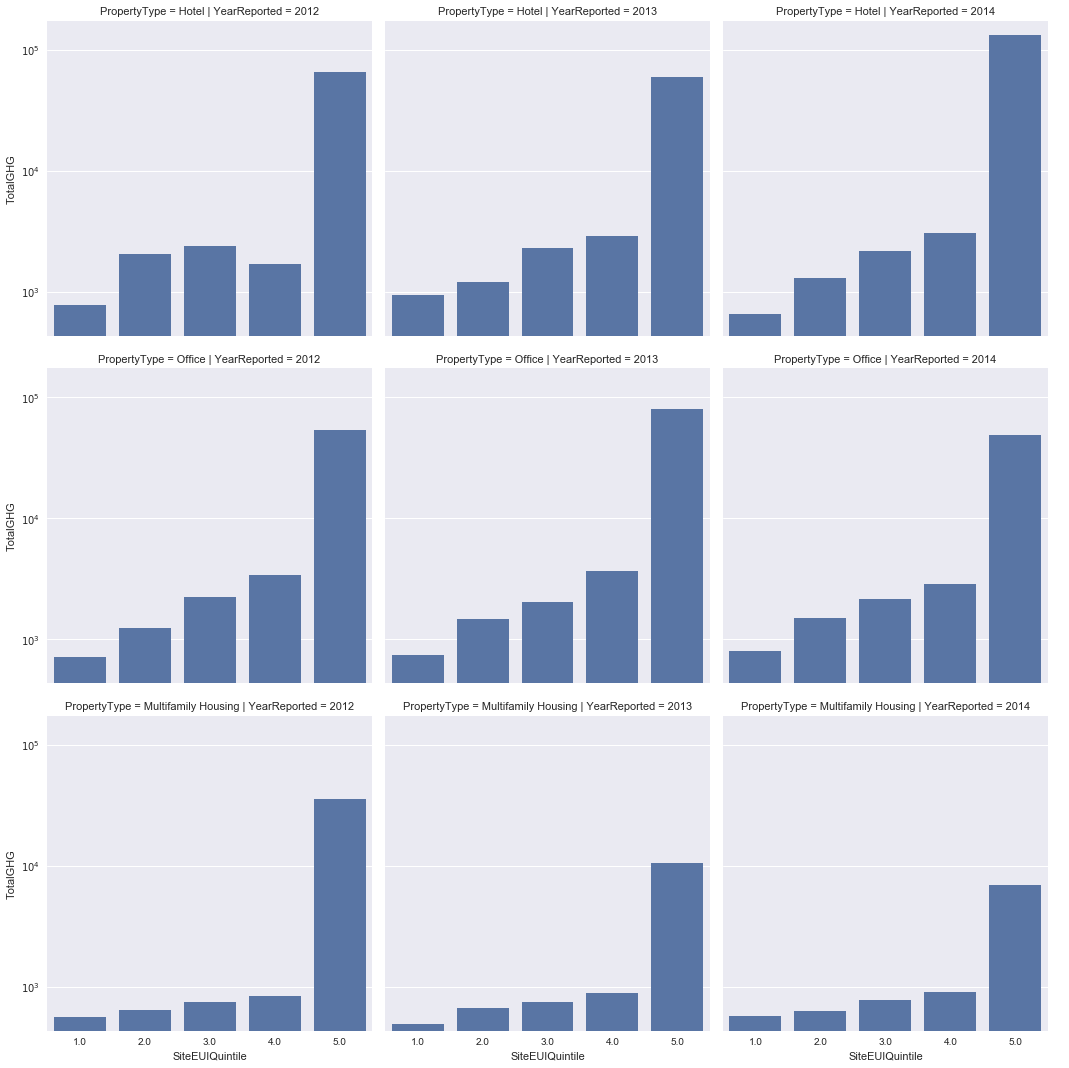

In [300]:

g = sns.FacetGrid(t, col='YearReported', row='PropertyType',size=5)
g = g.map(sns.barplot,'SiteEUIQuintile', 'TotalGHG', ci=None,estimator=np.mean).add_legend();
#plt.xlim((0,.3e7))
#plt.ylim((0,10e7))
plt.yscale('log')
plt.show()

In [232]:
boilerData2014 = pd.read_csv(filepath_or_buffer='../Oil_Boilers_-_Detailed_Fuel_Consumption_and_Building_Data2.csv')
boilerData2014 = boilerData2014[boilerData2014['Borough, Block and Lot #'].notnull()]
boilerData2014['HasBoiler'] = True

columns = ['Borough, Block and Lot #', 
       'Boiler Model', 'Number of identical boilers',
       'Boiler capacity (Gross BTU)', 'Boiler Installation Date',
       'Estimated retirement date of boiler (assuming 35 year average useful life)',
       'Is boiler dual fuel capable?', 
       'Age range of boiler', 
       'Burner Model',
       'Primary Fuel', 
       'Total Estimated Cosumption - High Estimate (Gallons) ',
       'Total Estimated Cosumption - Low Estimate (Gallons) ',
       'Total Estimated Cosumption - High Estimate (MMBTUs) ',
       'Total Estimated Cosumption - Low Estimate  (MMBTUs) ',
       'Building Type', 
       'Total area of buildings on lot',
       'Number of buildings on property (tax lot)', 
       'Number of floors',
       'Number of residential units', 
       'Number of total units',
       'Year constructed', 
       'Condominium housing?', 
       'Cooperative housing?',
       'HasBoiler']
selectBoilerData2014 = boilerData2014[columns]
selectBoilerData2014.rename(columns={'Borough, Block and Lot #':'BBL'}, inplace=True);



/Users/cooldude/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


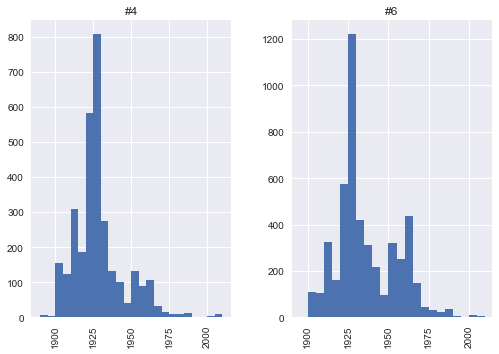

In [179]:
selectBoilerData2014['Year constructed'].hist(by=selectBoilerData2014['Primary Fuel'], bins=np.arange(1890,2014,5))
#plt.xscale('log')
plt.xlim(1890,2014)
plt.show()

In [330]:
top5 = selectBoilerData2014.groupby('Building Type')[['BBL']].count().sort_values('BBL', ascending=False).head(5).index
#selectBoilerData2014['SimplifiedBuildingType'] = selectBoilerData2014['Building Type']

#selectBoilerData2014[selectBoilerData2014['Building Type'].isnull()]
#.plot.pie(y='BBL')
#plt.show()

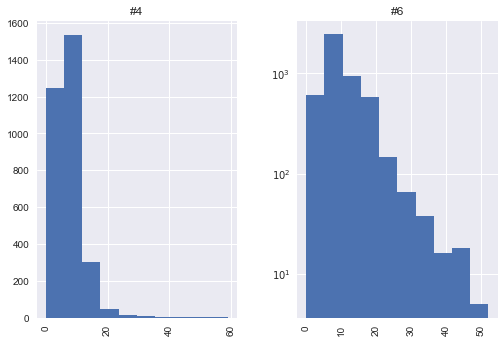

In [209]:
selectBoilerData2014['Number of floors'].hist(by=selectBoilerData2014['Primary Fuel'],bins=10)
plt.yscale('log')
#plt.xlim(1890,2014)
plt.show()

In [344]:
LL2014WithBoilerData =  selectPropertyTypes2014.merge(selectBoilerData2014, how='left', on='BBL')

LL2014WithBoilerData.groupby('HasBoiler')['TotalGHG'].sum()
#plt.show()

HasBoiler
True    4506381.8
Name: TotalGHG, dtype: float64

***********OLD CODE************

In [27]:
print('Total GHG Emissions, Maxes by property type:')
t.groupby('Primary Property Type - Self Selected')[['Total GHG Emissions(MtCO2e)','Site EUI(kBtu/ft2)']].max()/1e6

Total GHG Emissions, Maxes by property type:


,Total GHG Emissions(MtCO2e),Site EUI(kBtu/ft2)
Primary Property Type - Self Selected,,
Adult Education,0.000492,0.000077
Automobile Dealership,0.002451,0.000129
Bank Branch,0.000415,0.000065
College/University,3.595407,0.466789
Courthouse,0.000949,0.000214
Data Center,0.025244,0.000365
Distribution Center,0.004285,0.000260
Enclosed Mall,0.006933,0.000151
Financial Office,0.027942,0.000209


Drill down on Office buildings

In [75]:
t[t['Primary Property Type - Self Selected']=='Office'].sort_values('Total GHG Emissions(MtCO2e)',ascending=False).head(10)

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Street Number,Street Name,Borough,Zip Code,BBL on the Covered Buildings List,...,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings
11509,4412906.0,1004777501,NaN,NaN,1083493,121,AVENUE OF THE AMER,MANHATTAN,10013.0,Yes,...,10804120.0,10804120.0,12997870.0,12997870.0,1.0,60521600.0,0.0,60521600.0,84365.0,1.0
8866,3897375.0,1008120029,NaN,NaN,1015241,1352,BROADWAY,MANHATTAN,10018.0,Yes,...,9932717.0,9932717.0,11949490.0,11949490.0,NaN,50956980.0,0.0,50956980.0,77264.0,1.0
2789,2714770.0,1000510013,NaN,NaN,1001033,78,TRINITY PLACE,MANHATTAN,10006.0,Yes,...,778850.6,NaN,937003.0,NaN,1.0,8665042.0,0.0,8665042.0,167555.0,1.0
2028,2674308.0,1000670001,NaN,NaN,1079043,59,MAIDEN LANE,MANHATTAN,10038.0,Yes,...,58195.8,56313.8,70062.7,67798.1,1.0,4637455.0,0.0,4637455.0,1200000.0,1.0
10136,4367558.0,1012750050,NaN,NaN,1035321,295,MADISON AVENUE,MANHATTAN,10017.0,Yes,...,91990.6,91990.6,111179.9,111179.9,1.0,1925407.0,0.0,1925407.0,315000.0,1.0
11791,4495723.0,1000680036,NaN,NaN,1001116,100,WILLIAM STREET,MANHATTAN,10038.0,Yes,...,56825.6,56645.3,68634.2,68417.7,1.0,1439060.0,0.0,1439060.0,381163.0,1.0
8786,3795689.0,1013480023,NaN,NaN,1039972,1005,1 AVENUE,MANHATTAN,10022.0,Yes,...,48106.5,NaN,57899.1,NaN,NaN,1213858.2,30.2,1213828.0,379996.0,1.0
2314,2683328.0,1012920052,NaN,NaN,1035789,571,MADISON AVENUE,MANHATTAN,10022.0,Yes,...,46023.3,43355.9,55488.6,52279.9,1.0,1116832.0,0.0,1116832.0,365347.0,1.0
10415,4393123.0,1000700043,NaN,NaN,1001135,160,WATER STREET,MANHATTAN,10038.0,Yes,...,NaN,NaN,NaN,NaN,NaN,919318.5,0.0,919318.5,487562.0,1.0
9669,4043349.0,1012880069,NaN,NaN,1035721,665,5 AVENUE,MANHATTAN,10022.0,Yes,...,91915.3,92617.8,110703.8,111548.9,NaN,886140.2,0.0,886140.2,145171.0,1.0


Derive GHG Emissions per square foot. Only keep buildings with  per square foot. Even that is a large amount. Entries that fall outside these limits are outliers

In [79]:
t['TotalGHGPerFt2'] = t['Total GHG Emissions(MtCO2e)'].div(t['Reported Property Floor Area (Building(s)) (ft²)'],axis=0)



outliers2014 = t.loc[t['TotalGHGPerFt2']>=5,:].sort_values('Total GHG Emissions(MtCO2e)',ascending=False)
print('{} Outliers for 2014'.format(len(outliers2014)))
outliers2014[['Primary Property Type - Self Selected','Street Number',
       'Street Name', 'Borough', 'Zip Code','Total GHG Emissions(MtCO2e)','TotalGHGPerFt2','Reported Property Floor Area (Building(s)) (ft²)']]


13 Outliers for 2014


/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


10804120.0

Total GHG emissions for 2014 after outliers are controlled.

Total GHG emissions for 2014: 43.33 MtCo2e


Distribution by Total GHG Emissions Per Square Foot


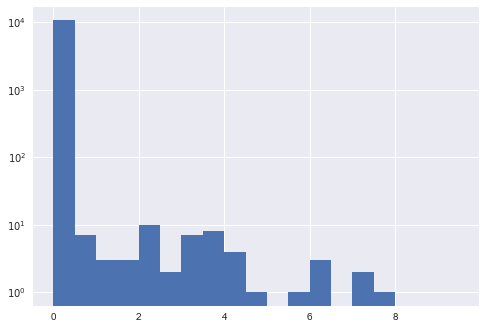

In [80]:
print('Total GHG emissions for 2014: {0:.2f} MtCo2e'.format(t.loc[t['TotalGHGPerFt2']<5,'Total GHG Emissions(MtCO2e)'].sum()/1e6))
print('\n')
print('Distribution by Total GHG Emissions Per Square Foot')
plt.hist(t.loc[t['TotalGHGPerFt2']<1000,'TotalGHGPerFt2'],log=True,bins=np.arange(0, 10, .5))
plt.show()


Control for outliers for all years

In [18]:
cleanData2014 = t[~t.index.isin(outliers2014.index)]




/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Distribution by Total GHG Emissions Per Square Foot


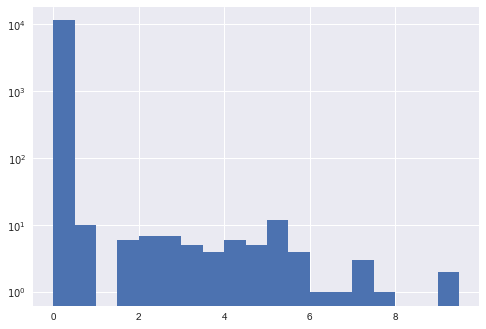

12748952.100000031


In [63]:
cleanData2013 = GHGReported2013[GHGReported2013['Reported Property Floor Area (Building(s)) (ft²)'].notnull()]

cleanData2013['TotalGHGPerFt2'] = cleanData2013['Total GHG Emissions(MtCO2e)'].div(cleanData2013['Reported Property Floor Area (Building(s)) (ft²)'], axis=0)

print('Distribution by Total GHG Emissions Per Square Foot')
plt.hist(cleanData2013.loc[cleanData2013['TotalGHGPerFt2']<1000,'TotalGHGPerFt2'],log=True,bins=np.arange(0, 10, .5))
plt.show()

#cleanData2013 = cleanData2013[cleanData2013['TotalGHGPerFt2']<5]
cleanData2013 = cleanData2013[cleanData2013['Site EUI(kBtu/ft2)']<1500]

print(cleanData2013['Total GHG Emissions(MtCO2e)'].sum())

outliers2013= cleanData2013.loc[cleanData2013['TotalGHGPerFt2']>5].sort_values('Total GHG Emissions(MtCO2e)',ascending=False)

Attempt to combine all 4 years of data. Standardize column names. Add a column for the year

Distribution by Total GHG Emissions Per Square Foot


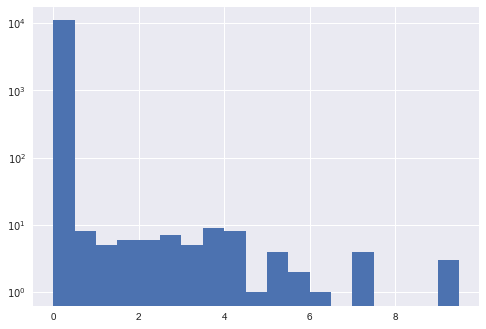

In [64]:
cleanData2012 = GHGReported2012[GHGReported2012['Property Floor Area (Buildngs and Parking)(ft2)'].notnull()]
cleanData2012['TotalGHGPerFt2'] = cleanData2012['Total GHG Emissions(MtCO2e)'].div(cleanData2012['Property Floor Area (Buildngs and Parking)(ft2)'],axis=0)

print('Distribution by Total GHG Emissions Per Square Foot')
plt.hist(cleanData2012.loc[cleanData2012['TotalGHGPerFt2']<1000,'TotalGHGPerFt2'],log=True,bins=np.arange(0, 10, .5))
plt.show()

outliers2012 = cleanData2012[cleanData2012['TotalGHGPerFt2']>5]

cleanData2012 = cleanData2012[cleanData2012['TotalGHGPerFt2']<5]


Lincoln center is in the list of outliers in 2012

In [65]:
outliers2012.sort_values('Total GHG Emissions(MtCO2e)',ascending=False)

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Indoor Water Intensity (All Water Sources)(gal/ft2),Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,Number of Buildings,Reported BINs,TotalGHGPerFt2
2667,1011340005,105,WEST 62 STREET,MANHATTAN,10023,Yes,218.0,254299.6,324092.3,169.02,Manual,NaN,9383283.01,467300.0,Entertainment/Culture,1,1081023;1081022;1028831;1028832,20.079784
2115,1009187501,240,EAST 38 STREET,MANHATTAN,10016,Yes,11843.0,494449.3,576072.0,412.23,Manual,1.0,5913995.09,151452.0,Office,0,NaN,39.048643
2294,1010110001,919,7 AVENUE,MANHATTAN,10019,Yes,3906.0,137405.4,166366.8,NaN,Manual,NaN,4339478.71,400000.0,Lodging,1,NaN,10.848697
3743,1013740001,781,5 AVENUE,MANHATTAN,10022,Yes,10791.0,71291.9,97208.4,NaN,Manual,1.0,1890824.13,335897.0,Hotel,1,1-01374-0001,5.629178
2112,1009170017,225,EAST 36 STREET,MANHATTAN,10016,Yes,1080.0,92295.5,111721.6,46.46,Manual,NaN,1397920.70,191838.0,Multifamily Housing,1,1020204,7.286985
535,1004550005,224,2 AVENUE,MANHATTAN,10003,Yes,5361.0,117011.8,152074.1,46.65,Manual,1.0,1275273.75,138068.0,Hospital (General Medical and Surgical),1,1006511,9.236563
4230,1014830028,530,EAST 72 STREET,MANHATTAN,10021,Yes,3956.0,72856.9,86947.6,48.47,Manual,NaN,1098694.70,191000.0,Multifamily Housing,1,1046259,5.752328
12080,1008730019,58,IRVING PLACE,MANHATTAN,10003,Yes,995.0,66799.0,92993.5,83.78,ABS,NaN,1078773.27,204543.0,Multifamily Housing,1,1017843,5.274066
2980,1012260045,132,WEST 96 STREET,MANHATTAN,10025,Yes,3971.0,64377.9,89615.4,50.76,Manual,NaN,999536.92,196650.0,Multifamily Housing,1,1032613,5.082822
4016,1014210037,220,EAST 67 STREET,MANHATTAN,10065,Yes,6375.0,89114.5,95024.6,NaN,Manual,NaN,838478.19,119172.0,Multifamily Housing,1,1043874,7.035866


Clean 2011 Data

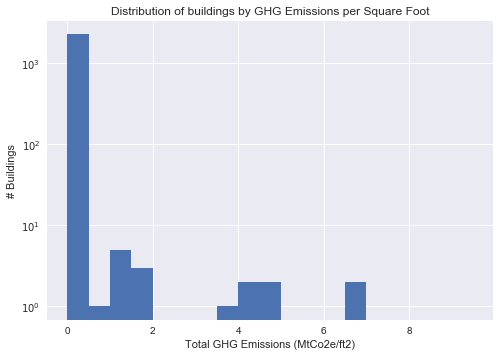

29


,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI,Weather Normalized Source EUI,Water per Square Foot,ENERGY STAR Score,GHG,Reported Building Square Footage,Reported Facility Type,Number of Buildings,Reported BINs,TotalGHGPerFt2
1515,1012690020,21,WEST 53 STREET,MANHATTAN,10019,Yes,767.0,137738.8,166887.9,NaN,NaN,6851830.16,630000.0,Other,3.0,1081127;1081128;1081129;1081130,10.875921
1606,1012850021,437,MADISON AVENUE,MANHATTAN,10022,Yes,950.0,83799.8,99408.0,NaN,1.0,5151397.08,778509.0,Office,1.0,NaN,6.617004
1246,1010110001,919,7 AVENUE,MANHATTAN,10019,Yes,849.0,139839.6,168158.8,NaN,NaN,4416327.63,400000.0,Lodging,1.0,NaN,11.040819
1542,1012740011,34,CENTRAL PARK SOUTH,MANHATTAN,10019,Yes,1267.0,0.0,0.0,NaN,NaN,3650170.73,0.0,NaN,1.0,NaN,inf
1403,1011340001,60,COLUMBUS AVENUE,MANHATTAN,10023,Yes,2241.0,160180.7,202162.3,NaN,1.0,1457236.49,115200.0,Residence Hall/Dormitory,3.0,1077844,12.649622
1059,1008670042,64,PARK AVENUE,MANHATTAN,10016,Yes,604.0,86585.0,102847.9,NaN,1.0,719382.26,105231.0,Hotel,1.0,NaN,6.836220
1839,1014270011,225,EAST 72 STREET,MANHATTAN,10021,Yes,1599.0,127569.5,154415.4,43.13,1.0,681419.81,67655.0,Residence Hall/Dormitory,1.0,1043968,10.071980
3618,4049810009,33-23,UNION STREET,QUEENS,11354,Yes,2057.0,0.0,0.0,NaN,NaN,1172.71,0.0,NaN,1.0,NaN,inf
3453,4025290020,43-40,57 AVENUE,QUEENS,11378,Yes,2453.0,0.0,0.0,NaN,NaN,1020.04,0.0,NaN,1.0,NaN,inf
281,1005220001,610,BROADWAY,MANHATTAN,10012,Yes,2619.0,0.0,0.0,NaN,NaN,575.84,0.0,NaN,1.0,NaN,inf


In [66]:
cleanData2011 = GHGReported2011[GHGReported2011['Reported Building Square Footage'].notnull()]
cleanData2011['TotalGHGPerFt2'] = cleanData2011['GHG'] / cleanData2011['Reported Building Square Footage']


plt.hist(cleanData2011.loc[cleanData2011['TotalGHGPerFt2']<1000,'TotalGHGPerFt2'],log=True,bins=np.arange(0, 10, .5))
plt.title('Distribution of buildings by GHG Emissions per Square Foot')
plt.xlabel('Total GHG Emissions (MtCo2e/ft2)')
plt.ylabel('# Buildings')
plt.grid(True)
plt.show()

outliers2011 = cleanData2011[cleanData2011['TotalGHGPerFt2']>5]
cleanData2011 = cleanData2011[cleanData2011['TotalGHGPerFt2']<5]

print(len(outliers2011))
outliers2011.sort_values('GHG',ascending=False)

After removing outliers. 2011 seems to be poor in terms of data quality

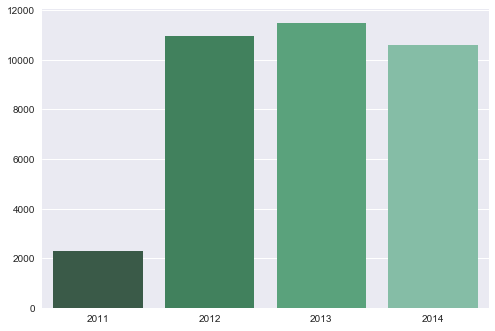

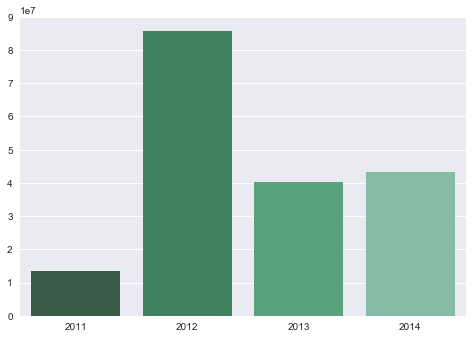

In [59]:
sns.barplot([2011,2012,2013,2014], [len(cleanData2011),len(cleanData2012),len(cleanData2013),len(cleanData2014)], palette="BuGn_d")
#ax1.set_ylabel("Sequential")
#plt.plot([-1, 4], [55.61e6, 55.61e6], linewidth=2)
plt.show()

sns.barplot([2011,2012,2013,2014], [cleanData2011['GHG'].sum(),
                                    cleanData2012['Total GHG Emissions(MtCO2e)'].sum(),
                                    cleanData2013['Total GHG Emissions(MtCO2e)'].sum(),
                                    cleanData2014['Total GHG Emissions(MtCO2e)'].sum()], palette="BuGn_d")
#ax1.set_ylabel("Sequential")
#plt.plot([-1, 4], [55.61e6, 55.61e6], linewidth=2)
plt.show()

In [29]:
print(cleanData2014.columns)
print(cleanData2013.columns)
print(cleanData2012.columns)
print(cleanData2011.columns)

Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identification Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'BBL on the Covered Buildings List',
       'DOF Benchmarking Submission Status',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)', 'ENERGY STAR Score',
       'Total GHG Emissions(MtCO2e)', 'Direct GHG Emissions(MtCO2e)',
       'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Number of Buildings', 'TotalGHGPerFt2'],
      dtype='object')
Index(

In [47]:
boilerData2014 = pd.read_csv(filepath_or_buffer='../Oil_Boilers_-_Detailed_Fuel_Consumption_and_Building_Data2.csv')
t = boilerData2014[boilerData2014['Borough, Block and Lot #'].notnull()]

In [48]:
boilerData2014.columns

Index(['Borough, Block and Lot #', 'Facility Address',
       'Natural Gas Utility (Con Edison or National Grid', 'Building Manager',
       'Owner', 'Owner Address', 'DEP Boiler Application #',
       'Deadline for phasing out #6 oil (i.e. data of next DEP permit renewal after July 1 2012)',
       'Boiler Model', 'Number of identical boilers',
       'Boiler capacity (Gross BTU)', 'Boiler Installation Date',
       'Estimated retirement date of boiler (assuming 35 year average useful life)',
       'Is boiler dual fuel capable?', 'Age range of boiler', 'Burner Model',
       'Primary Fuel', 'Total Estimated Cosumption - High Estimate (Gallons) ',
       'Total Estimated Cosumption - Low Estimate (Gallons) ',
       'Total Estimated Cosumption - High Estimate (MMBTUs) ',
       'Total Estimated Cosumption - Low Estimate  (MMBTUs) ',
       'Needs to comply with Greener Greater Buildings Laws?',
       'Deadline for complying with Audit and Retrocommissioning Law',
       'Building Typ

In [56]:
t.describe()

,"Borough, Block and Lot #",Number of identical boilers,Boiler capacity (Gross BTU),Boiler Installation Date,Estimated retirement date of boiler (assuming 35 year average useful life),Total Estimated Cosumption - High Estimate (Gallons),Total Estimated Cosumption - Low Estimate (Gallons),Total Estimated Cosumption - High Estimate (MMBTUs),Total Estimated Cosumption - Low Estimate (MMBTUs),Deadline for complying with Audit and Retrocommissioning Law,City Council District,Total area of buildings on lot,Number of buildings on property (tax lot),Number of floors,Number of residential units,Number of total units,Year constructed
count,8.048000e+03,8048.000000,8.048000e+03,8048.000000,8048.000000,8.048000e+03,8.048000e+03,8048.000000,8048.000000,5291.000000,8048.000000,8.048000e+03,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000
mean,1.814174e+09,1.137053,2.606752e+03,1988.469433,2023.923335,6.431444e+04,4.502010e+04,9565.490432,6695.855865,2017.543187,12.263419,1.100695e+05,2.008449,8.755964,80.166252,84.815358,1923.090954
std,1.040945e+09,0.392522,1.411548e+05,9.989260,9.154771,7.331382e+04,5.131967e+04,10978.601994,7685.013561,2.850294,9.895286,2.078017e+05,6.765998,5.933130,117.053763,117.388955,133.751628
min,1.000088e+09,1.000000,0.000000e+00,1951.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2013.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.013380e+09,1.000000,3.430000e+00,1983.000000,2018.000000,3.040025e+04,2.127975e+04,4500.000000,3150.000000,2015.000000,5.000000,4.281000e+04,1.000000,6.000000,32.000000,37.000000,1921.000000
50%,1.022150e+09,1.000000,4.950000e+00,1987.000000,2022.000000,4.500000e+04,3.150000e+04,6745.000000,4722.000000,2018.000000,10.000000,6.519100e+04,1.000000,6.000000,54.000000,56.000000,1928.000000
75%,2.040500e+09,1.000000,6.900000e+00,1996.000000,2031.000000,7.290675e+04,5.103475e+04,10791.000000,7553.500000,2020.000000,16.000000,1.180240e+05,1.000000,12.000000,84.000000,87.000000,1941.000000
max,5.060500e+09,7.000000,1.004300e+07,2009.000000,2044.000000,1.499050e+06,1.049335e+06,224858.000000,157400.000000,2022.000000,51.000000,1.343508e+07,99.000000,59.000000,2391.000000,2391.000000,2009.000000


There are entries where Site EUI is NA. Some building only reported water usage statistics.

In [189]:
# 2014 - only primary BBL entries
noSiteEUIReported2014 = primaryEnergyAndWaterData2014[primaryEnergyAndWaterData2014['Site EUI(kBtu/ft2)'].isnull()]
print("Percent of buildings that didn't reporting Site EUI in 2013: {0:.2f}%".format(len(noSiteEUIReported2014)/len(primaryEnergyAndWaterData2014)*100))

noGHGeReported2014 = primaryEnergyAndWaterData2014[primaryEnergyAndWaterData2014['Total GHG Emissions(MtCO2e)'].isnull() or primaryEnergyAndWaterData2014['Total GHG Emissions(MtCO2e)'] < .0001 ]
print("Percent of buildings that didn't report GHG emissions in 2013: {0:.10f}%".format(len(noGHGeReported2014)/len(primaryEnergyAndWaterData2014)*100))

#primaryEnergyAndWaterData2014[primaryEnergyAndWaterData2014['Total GHG Emissions(MtCO2e)'].notnull()].sort_values(by='Total GHG Emissions(MtCO2e)', ascending=True)

# 2013 - only primary BBL entries
#noSiteEUIReported2013 = primaryEnergyAndWaterData2013[primaryEnergyAndWaterData2013['Site EUI(kBtu/ft2)'].isnull()]
#print("Percent of buildings that didn't reporting Site EUI in 2013: {0:.2f}%".format(len(noSiteEUIReported2013)/len(primaryEnergyAndWaterData2013)*100))

#noGHGeReported2013 = primaryEnergyAndWaterData2013[primaryEnergyAndWaterData2013['Total GHG Emissions(MtCO2e)'].isnull()]
#print("Percent of buildings that didn't report GHG emissions in 2013: {0:.2f}%".format(len(noGHGeReported2013)/len(primaryEnergyAndWaterData2013)*100))


#noSiteEUIReported2012 = energyAndWaterData2012[energyAndWaterData2012['Site EUI(kBtu/ft2)'].isnull()]
#print("Percent of buildings that didn't reporting Site EUI in 2012: {0:.2f}%".format(len(noSiteEUIReported2012)/len(energyAndWaterData2012)*100))

#noGHGeReported2012 = energyAndWaterData2012[energyAndWaterData2012['Total GHG Emissions(MtCO2e)'].isnull()]
#print("Percent of buildings that didn't report GHG emissions in 2012: {0:.2f}%".format(len(noGHGeReported2012)/len(energyAndWaterData2012)*100))



Percent of buildings that didn't reporting Site EUI in 2013: 21.35%


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

['Office' nan 'Multifamily Housing' 'Distribution Center' 'K-12 School'
 'Mixed Use Property' 'Other' 'Hotel' 'Senior Care Community'
 'College/University' 'Hospital (General Medical & Surgical)' 'Parking'
 'Non-Refrigerated Warehouse' 'Retail Store' 'Data Center'
 'Self-Storage Facility' 'Residence Hall/Dormitory'
 'Other - Entertainment/Public Assembly' 'Medical Office'
 'Other - Recreation' 'Library' 'Social/Meeting Hall'
 'Urgent Care/Clinic/Other Outpatient' 'Financial Office'
 'Other - Education' 'Other - Mall' 'Other - Lodging/Residential'
 'Performing Arts' 'Laboratory' 'Automobile Dealership'
 'Manufacturing/Industrial Plant' 'Worship Facility'
 'Outpatient Rehabilitation/Physical Therapy' 'Movie Theater'
 'Veterinary Office' 'Other - Specialty Hospital' 'Police Station' 'Museum'
 'Enclosed Mall' 'Restaurant' 'Other - Utility' 'Strip Mall'
 'Supermarket/Grocery Store' 'Refrigerated Warehouse' 'Other - Services'
 'Food Service' 'Other - Technology/Science' 'Bank Branch' 'Courth